In [1]:
#!pip install sgmllib3k

## Libraries

In [2]:
#import sgmllib
import pandas as pd
from bs4 import BeautifulSoup , SoupStrainer
from datetime import datetime
%matplotlib inline

## Read all the file

In [3]:
# convert a string to data in our case 
def convertToDate(str):
    from dateutil import parser
 
    myD = parser.parse(str.split('.')[0])
    return myD

In [4]:
#create a dataframe from a reuters
def createDf(reuters,df):
    text = reuters.find("text").text
    newText = text[text.find('-')+1:len(text)]
    place = text[text.find(',')]
    """ To test my columns
    print("Topic : "+reuters.topics.d.text)
    #print("Title : "+reuters.title.text)
    print(newText.strip())
    print("")
    """           
    #we can get error because could be 'none'
    myTopic = myTitle = myText = myPlace = str()

    myTopic = reuters.topics.d.text
    try:
        myTitle = reuters.title.text
    except:
        pass
    try:
        myPlace = reuters.places.d.text
    except:
        pass
    myText = newText.strip().replace('\n',' ')
    myDate = convertToDate(reuters.date.text)
    

    df =df.append({"Text":myText,"Country":myPlace,"Title":myTitle,"Topic":myTopic,"Date":myDate},ignore_index=True)
    return df

In [5]:
# browse all the reteurs to get just our topics
def fillDataFrame(df,myTopics,myfile):
    f = open(myfile,encoding="utf8", errors='ignore') #problems with file 17
    data = f.read()
    #data = [l.decode('utf8', 'ignore') for l in f.readlines()]
    soup = BeautifulSoup(data)
    
    # we browse all my files
    for reuters in soup.find_all("reuters"):
        # we verifie that there is a topic
        if reuters.topics.d:
            # we verifie that the topic is one of our topic
            if str(reuters.topics.d.text) in myTopics:
                df =createDf(reuters,df) # we create the dataframe with all the datas
    return df

In [6]:
#Our topics
myTopics = ['money-fx','ship','interest','acq','earn']

#we creat my final dataframe with my data
df = pd.DataFrame(columns=['Topic','Title','Country','Date','Text'])

# browse all the files
print("21 files to load ...")
for i in range(22):
    nameFile = ""
    if i <10:
        nameFile = 'DATA/reut2-00'+str(i)+'.sgm'
    else:
        nameFile = 'DATA/reut2-0'+str(i)+'.sgm'
    print(nameFile)# just for try 
    df = fillDataFrame(df,myTopics,nameFile)

21 files to load ...
DATA/reut2-000.sgm
DATA/reut2-001.sgm
DATA/reut2-002.sgm
DATA/reut2-003.sgm
DATA/reut2-004.sgm
DATA/reut2-005.sgm
DATA/reut2-006.sgm
DATA/reut2-007.sgm
DATA/reut2-008.sgm
DATA/reut2-009.sgm
DATA/reut2-010.sgm
DATA/reut2-011.sgm
DATA/reut2-012.sgm
DATA/reut2-013.sgm
DATA/reut2-014.sgm
DATA/reut2-015.sgm
DATA/reut2-016.sgm
DATA/reut2-017.sgm
DATA/reut2-018.sgm
DATA/reut2-019.sgm
DATA/reut2-020.sgm
DATA/reut2-021.sgm


In [7]:
df.head()

,Topic,Title,Country,Date,Text
0,earn,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,usa,1987-02-26 15:17:11,Champion Products Inc said its board of direct...
1,acq,COMPUTER TERMINAL SYSTEMS <CPML> COMPLETES SALE,usa,1987-02-26 15:18:06,Computer Terminal Systems Inc said it has comp...
2,earn,COBANCO INC <CBCO> YEAR NET,usa,1987-02-26 15:18:59,"Shr 34 cts vs 1.19 dlrs Net 807,000 vs 2,8..."
3,earn,OHIO MATTRESS <OMT> MAY HAVE LOWER 1ST QTR NET,usa,1987-02-26 15:19:15,"Ohio Mattress Co said its first quarter, endin..."
4,earn,AM INTERNATIONAL INC <AM> 2ND QTR JAN 31,usa,1987-02-26 15:20:13,Oper shr loss two cts vs profit seven cts ...


In [8]:
df.shape 

(7625, 5)

In [9]:
## Few visualizations about countries

In [10]:
pd.value_counts(df["Topic"])

earn        3972
acq         2423
money-fx     682
interest     339
ship         209
Name: Topic, dtype: int64

In [11]:
pd.value_counts(df["Country"])[:10]

usa             5285
                 558
canada           410
uk               380
japan            192
west-germany     133
australia         86
france            68
netherlands       58
hong-kong         42
Name: Country, dtype: int64

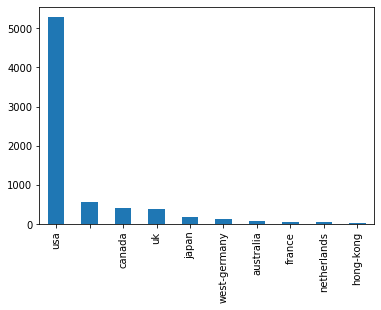

In [12]:
pd.value_counts(df["Country"])[:10].plot(kind='bar')

In [13]:
print("nombers :",len(df[df["Country"]=="france"]))

nombers : 68


## Information about date

In [14]:
print("The articles have been written from " + str(min(df["Date"]))+ " to "+ str(max(df["Date"])) )

The articles have been written from 1987-02-26 15:17:11 to 1987-10-20 19:17:19


## Descriptive analysis

In [15]:
#!pip install gensim
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.summarization import summarize
#maL = tokenizer.tokenize(str)

In [16]:
#myTopics = ['money-fx','ship','interest','acq','earn']

#create one dataframe for each topic
df_money = df[df["Topic"]=="money-fx"]
df_ship = df[df["Topic"]=="ship"]
df_interest = df[df["Topic"]=="interest"]
df_acq = df[df["Topic"]=="acq"]
df_earn = df[df["Topic"]=="earn"]

In [17]:
# concat a column of string
def concatCol(df_money , column):
    text_money = ""
    for text in df_money[column]:
        text_money += text
    return text_money


In [18]:
#allow to clean my data and return a list
def preProcess(df):
    text = concatCol(df,"Text") #concatenation of all the text
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    list_word = tokenizer.tokenize(text.lower()) # tokenize all the data 
    list_word_stops = [ _ for _ in list_word if _ not in stops] #remove all the stop word
    list_lemma = [lemmatizer.lemmatize(word) for word in list_word_stops] 
    return list_lemma

In [19]:
list_words_money = preProcess(df_money)
list_words_ship = preProcess(df_ship)
list_words_interest = preProcess(df_interest)
list_words_acq = preProcess(df_acq)
list_words_earn = preProcess(df_earn)

## Main characteristics

In [20]:
#return a dict with the number of occurence
def occurenceWords(words):
    dico = defaultdict(int)
    for word in words:
        dico[word]+=1
    return sorted(dico.items(),key =lambda x: x[1], reverse= True)[:40]

In [21]:
dico_money = occurenceWords(list_words_money)
dico_ship = occurenceWords(list_words_ship)
dico_interest = occurenceWords(list_words_interest)
dico_acq = occurenceWords(list_words_acq)
dico_earn = occurenceWords(list_words_earn)

In [22]:
dico_acq

[('said', 7212),
 ('share', 3241),
 ('dlrs', 2773),
 ('company', 2771),
 ('mln', 2218),
 ('inc', 2042),
 ('pct', 1863),
 ('corp', 1587),
 ('offer', 1337),
 ('stock', 1260),
 ('would', 1167),
 ('group', 1137),
 ('co', 855),
 ('sale', 791),
 ('common', 771),
 ('acquisition', 764),
 ('also', 729),
 ('shareholder', 717),
 ('ltd', 670),
 ('agreement', 657),
 ('merger', 647),
 ('new', 636),
 ('bank', 633),
 ('stake', 628),
 ('board', 578),
 ('security', 559),
 ('u', 554),
 ('year', 553),
 ('cash', 548),
 ('price', 522),
 ('unit', 499),
 ('investment', 498),
 ('one', 495),
 ('buy', 479),
 ('acquire', 470),
 ('business', 468),
 ('subsidiary', 462),
 ('plan', 454),
 ('exchange', 450),
 ('agreed', 449)]

In [23]:
#stock the not very importante word for each topic
stopsMoney = {'said','bank','dollars','market',"u",'would','billion','money','dollar','mnl','stg'}
stopsShip = {'said','u','port','would','vessel','year','pct','two','last','new','dollar'}
stopsInterest = {'said','pct','market','one','new','dollar'}
stopsAcq = {'said','would','dlrs','mln','share','dlrs','also','dollar','company'}
stopsEarn = {'v','mln','ct','1987','share','reutersshr','said','dollar','dlr','dlrs'}

In [24]:
#concatenation of string list
moneyStr = " ".join(list_words_money)
shipStr = " ".join(list_words_ship)
interestStr = " ".join(list_words_interest)
acqStr = " ".join(list_words_acq)
earnStr = " ".join(list_words_earn)

Money : 


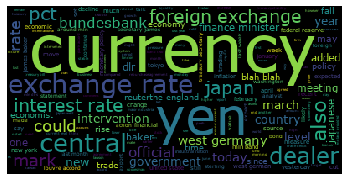

Shipping : 


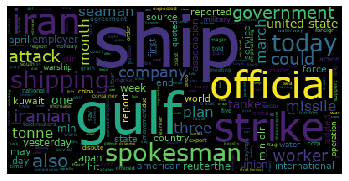

Interest : 


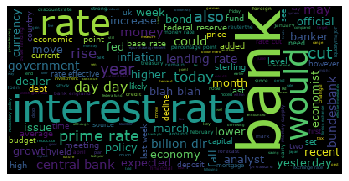

Acq : 


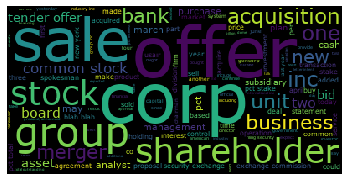

Earn : 


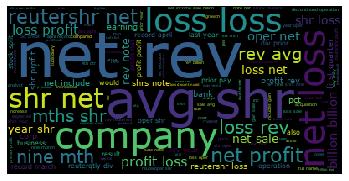

In [25]:
## Simple visualtion
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

def generate_wordcloud(text,stp): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = stp # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("Money : ")
generate_wordcloud(moneyStr,stopsMoney)
print("Shipping : ")
generate_wordcloud(shipStr,stopsShip)
print("Interest : ")
generate_wordcloud(interestStr,stopsInterest)
print("Acq : ")
generate_wordcloud(acqStr,stopsAcq)
print("Earn : ")
generate_wordcloud(earnStr,stopsEarn)

# Summarization

## gensim : famous library that return a sumary of a string 

In [26]:
moneyStr = concatCol(df_money,"Text")
shipStr = concatCol(df_ship,"Text")
interestStr = concatCol(df_interest,"Text")
acqStr = concatCol(df_acq,"Text")
earnStr = concatCol(df_earn,"Text")

In [27]:
print(summarize(shipStr,word_count = 100))

But Pentagon spokesman Fred Hoffmann said that reports the naval strike force was in the region did not mean the United States was sending a new warning to Iran against escalating attacks on shipping in the Persian Gulf.
The agency, received in London, quoted him as saying that Iran did not need missiles to close the strait, 24 miles wide at its narrowest, because "we can close it with artillery only."     He added "We have the longest coasts and the highest interest here and the small southern (Gulf) states have a lesser interest compared with us and therefore it is natural for us to protect the security of the Strait of Hormuz more than others."  REUTERThe Soviet Union supports the freedom of navigation in the Gulf and does not support any act which would cause the deterioration of the situation in the region, its ambassador to Kuwait, Ernest Zverev, told the Kuwaiti news agency KUNA.


In [28]:
summarizeMoney = summarize(moneyStr,word_count = 100)
print(summarizeMoney[summarizeMoney.find('.'):len(summarizeMoney)])

.S. INTERVENED TO BUY 50 MLN DLRS AGAINST YEN ON JANUARY 28, FED SAYS Blah blah blah.U.S. authorities intervened in the foreign exchange market to support the dollar on one occasion during the period between the start of November 1986 and the end of January, the Federal Reserve Bank of New York said in a report.


In [29]:
summarizeInterest = summarize(interestStr,word_count = 100)
print(summarizeInterest[summarizeInterest.find('.'):len(summarizeInterest)])

.MAJOR SWISS BANKS RAISE CUSTOMER TIME DEPOSIT RATES 1/4 POINT TO 3-1/4 PCT - CREDIT SUISSE Blah blah blah.The Bundesbank is unlikely to change its credit policies at its central bank council meeting on Thursday, as exchange rates and short-term interest rates have stabilized over the past few weeks, money market dealers said.
REUTERBritish bank base lending rates are likely to fall by as much as one full point to 9-1/2 pct this week following the sharp three billion stg cut in the U.K. Central government borrowing target to four billion stg set in today's 1987 budget, bank analysts said.


In [30]:
#print(summarize(acqStr,word_count = 100))

In [31]:
#print(summarize(earnStr,word_count = 100))

## Predictive analysis

In [32]:
!pip install --upgrade tensorflow
!pip install tensorflow_datasets as tfds

Requirement already up-to-date: tensorflow in /Users/henri/opt/anaconda3/lib/python3.7/site-packages (2.0.0)
  Using cached https://files.pythonhosted.org/packages/e2/14/900746f9b8e1ed8ea93661f1a62b3937a5a25858d550ece38de8ea579f2d/tensorflow_datasets-1.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b4/08/226c133ec497d25a63edb38527c02db093c7d89e6d4cdc91078834486a5d/as-0.1-py3-none-any.whl
  ERROR: Could not find a version that satisfies the requirement tfds (from versions: none)
ERROR: No matching distribution found for tfds


In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
!pip install --upgrade tensorflow ## new version 
import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_datasets as tfds
from tensorflow import keras

Requirement already up-to-date: tensorflow in /Users/henri/opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [34]:
#!pip install tensorflow_hub
import tensorflow_hub as hub
from sklearn.preprocessing import StandardScaler

In [35]:
#Conversion => text to vector (size 20)
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding,input_shape=[], dtype=tf.string, trainable=True)

In [36]:
def preProcess_no_concat(text):
    #text = concatCol(df,"Text") #concatenation of all the text
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    list_word = tokenizer.tokenize(text.lower()) # tokenize all the data 
    list_word_stops = [ _ for _ in list_word if _ not in stops] #remove all the stop word
    list_lemma = [lemmatizer.lemmatize(word) for word in list_word_stops] 
    return " ".join(list_lemma)

In [37]:
#create the vector 
dfbis = []
for _ in df["Text"]:
    wordsStr = preProcess_no_concat(_)
    dfbis.append(wordsStr)
convDf = hub_layer(dfbis)
    

In [38]:
convDf

<tf.Tensor: id=177, shape=(7625, 20), dtype=float32, numpy=
array([[-2.5080395 , -1.2343152 , -0.5218949 , ..., -1.8875852 ,
         2.352242  ,  0.8005083 ],
       [ 0.99879766, -1.9710144 ,  0.09354912, ..., -2.9492188 ,
         3.61737   , -2.0754051 ],
       [-2.2216463 , -0.06714327, -1.1837395 , ..., -1.0318708 ,
         0.45127982,  0.79604167],
       ...,
       [-0.9804899 , -2.4513354 , -0.14267205, ..., -2.4253747 ,
         0.7743093 ,  0.05031532],
       [-1.889017  ,  0.9522857 ,  1.7384897 , ..., -5.2963934 ,
         0.54944444, -0.8452777 ],
       [-0.99360204, -0.19083524, -0.5701817 , ..., -1.9575193 ,
         1.1052428 ,  0.06099549]], dtype=float32)>

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics



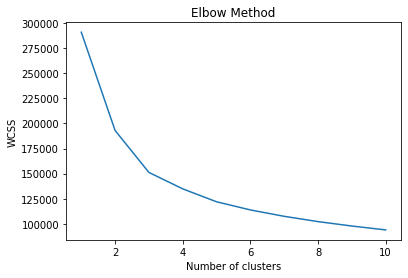

In [40]:
# to get the best number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(convDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
## kmeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_kmeans = kmeans.fit_predict(convDf)

In [42]:
## MiniBatchKMeans
MiniBatch = MiniBatchKMeans(n_clusters=5, init='k-means++',max_iter=300, n_init=10,random_state=0)
pred_y_miniB = MiniBatch.fit_predict(convDf)

In [43]:
#print(pred_y_kmeans[:20]) , print(pred_y_miniB[:20])

In [44]:
#just to know how many article there are in each cluster
import numpy as np
x = kmeans.labels_
unique, counts = np.unique(x, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0  399]
 [   1 1356]
 [   2 2763]
 [   3  944]
 [   4 2163]]


In [45]:
pd.value_counts(df["Topic"])

earn        3972
acq         2423
money-fx     682
interest     339
ship         209
Name: Topic, dtype: int64

In [46]:
gros_remplacementDico ={
    'Topic':{
        'earn':0,
        'interest':1,
        'ship':2,
        'acq':3,
        'money-fx':4,
    }
}

In [47]:
df2 = df.replace(gros_remplacementDico)

In [48]:
#print result of the clustering 
def printResult(labels):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(df["Topic"], labels))
    print("Completeness: %0.3f" % metrics.completeness_score(df["Topic"],labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(df["Topic"], labels))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(df["Topic"], labels))
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(convDf, kmeans.labels_, sample_size=1000))
   

In [49]:

printResult(kmeans.labels_)
print("")
printResult(MiniBatch.labels_)

Homogeneity: 0.372
Completeness: 0.297
V-measure: 0.330
Adjusted Rand-Index: 0.389
Silhouette Coefficient: 0.258

Homogeneity: 0.348
Completeness: 0.286
V-measure: 0.314
Adjusted Rand-Index: 0.397
Silhouette Coefficient: 0.252


## TF - IDF Vectorisation

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#another technique to transfort the texts in vector using tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfbis)

In [52]:
X

<7625x32945 sparse matrix of type '<class 'numpy.float64'>'
	with 354304 stored elements in Compressed Sparse Row format>

In [53]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans2.fit_predict(X)

In [54]:
printResult(kmeans2.labels_)

Homogeneity: 0.301
Completeness: 0.278
V-measure: 0.289
Adjusted Rand-Index: 0.092
Silhouette Coefficient: 0.249


In [55]:
#print the most importants word for each cluster 
true_k = 5
print("Top terms per cluster:")
order_centroids = kmeans2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 blah
 say
 qtr
 ct
 pct
 dlrs
 fed
 shr
 1st
 mln
 4th
 corp
 dealer
 inc
 rate
 bank
 profit
 loss
 offer
 share
 repurchase
 group
 tender
 co
 set
 dlr
 billion
 34
 buy
 official
Cluster 1:
 said
 share
 pct
 dlrs
 company
 bank
 mln
 inc
 corp
 rate
 reuter
 stock
 billion
 would
 market
 year
 group
 stg
 offer
 sale
 common
 co
 shareholder
 new
 dollar
 dividend
 exchange
 first
 april
 also
Cluster 2:
 mln
 ct
 net
 shr
 rev
 dlrs
 avg
 shrs
 billion
 note
 mths
 oper
 reuter
 nine
 sale
 year
 1986
 gain
 qtr
 share
 includes
 six
 31
 loss
 tax
 1987
 12
 diluted
 excludes
 28
Cluster 3:
 ct
 div
 qtly
 record
 pay
 prior
 april
 march
 may
 15
 reuter
 10
 30
 31
 20
 june
 one
 payable
 25
 qtrly
 qtr
 eight
 five
 three
 16
 six
 13
 24
 17
 27
Cluster 4:
 loss
 profit
 ct
 mln
 net
 shr
 rev
 dlrs
 oper
 year
 note
 includes
 avg
 shrs
 reuter
 mths
 nine
 gain
 sale
 qtr
 1986
 six
 excludes
 discontinued
 nil
 operation
 tax
 share
 d

## DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
db = DBSCAN(eps=0.3, min_samples=10).fit(convDf)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [58]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(convDf, db.labels_, sample_size=1000))

Estimated number of clusters: 3
Estimated number of noise points: 7587
Silhouette Coefficient: -0.230
